<a href="https://colab.research.google.com/github/jgtres/UNIR_SCAQ2/blob/main/Actividad_1_master_IA_SCA_JGS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 1: Conceptos generales de redes neuronales
En esta actividad vamos a revisar algunos de los conceptos basicos de las redes neuronales, pero no por ello menos importantes.

El dataset a utilizar es Fashion MNIST, un problema sencillo con imágenes pequeñas de ropa, pero más interesante que el dataset de MNIST. Puedes consultar más información sobre el dataset en este enlace.

El código utilizado para contestar tiene que quedar claramente reflejado en el Notebook. Puedes crear nuevas cells si así lo deseas para estructurar tu código y sus salidas. A la hora de entregar el notebook, asegúrate de que los resultados de ejecutar tu código han quedado guardados (por ejemplo, a la hora de entrenar una red neuronal tiene que verse claramente un log de los resultados de cada epoch).

In [6]:
import tensorflow as tf
print(tf.__version__)

2.17.1


En primer lugar vamos a importar el dataset Fashion MNIST (recordad que este es uno de los dataset de entranamiento que estan guardados en keras) que es el que vamos a utilizar en esta actividad:

In [7]:
mnist = tf.keras.datasets.fashion_mnist

Llamar a **load_data** en este dataset nos dará dos conjuntos de dos listas, estos serán los valores de entrenamiento y prueba para los gráficos que contienen las prendas de vestir y sus etiquetas.

Nota: Aunque en esta actividad lo veis de esta forma, también lo vais a poder encontrar como 4 variables de esta forma: training_images, training_labels, test_images, test_labels = mnist.load_data()

In [9]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

Antes de continuar vamos a dar un vistazo a nuestro dataset, para ello vamos a ver una imagen de entrenamiento y su etiqueta o clase.

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 

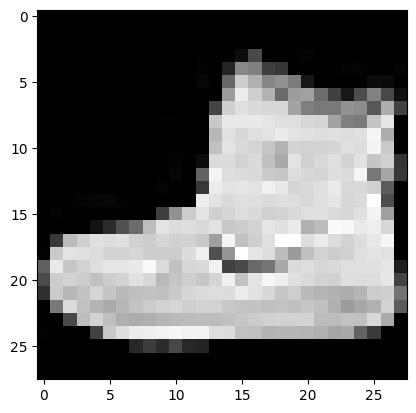

In [10]:
import numpy as np
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt
plt.imshow(training_images[0], cmap="gray") # recordad que siempre es preferible trabajar en blanco y negro
#
print(training_labels[0])
print(training_images[0])

Habreis notado que todos los valores numericos están entre 0 y 255. Si estamos entrenando una red neuronal, una buena practica es transformar todos los valores entre 0 y 1, un proceso llamado "normalización" y afortunadamente en Python es fácil normalizar una lista. Lo puedes hacer de esta manera:

In [11]:
training_images = training_images / 255.0
test_images = test_images / 255.0

Ahora vamos a definir el modelo, pero antes vamos a repasar algunos comandos y conceptos muy utiles:
* **Sequential**: Eso define una SECUENCIA de capas en la red neuronal
* **Dense**: Añade una capa de neuronas
* **Flatten**: ¿Recuerdas cómo eran las imagenes cuando las imprimiste para poder verlas? Un cuadrado, Flatten sólo toma ese cuadrado y lo convierte en un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa
* **Relu** significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
* **Softmax** toma un conjunto de valores, y escoge el más grande.

 **Pregunta 1 (3.5 puntos)**. Utilizando Keras, y preparando los datos de X e y como fuera necesario, define y entrena una red neuronal que sea capaz de clasificar imágenes de Fashion MNIST con las siguientes características:

* Una hidden layer de tamaños 128, utilizando unidades sigmoid
Optimizador Adam.
* Durante el entrenamiento, la red tiene que mostrar resultados de loss y accuracy por cada epoch.
* La red debe entrenar durante 10 epochs y batch size de 64.
* La última capa debe de ser una capa softmax.
* Tu red tendría que ser capaz de superar fácilmente 80% de accuracy.

In [12]:
### Tu código para la red neuronal de la pregunta 1 aquí ###

## Definición del Modelo

model_128 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(128, activation='sigmoid'), # Capa oculta con 128 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_128.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_128.fit(training_images, training_labels, epochs=10, batch_size=64)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7408 - loss: 0.8176
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8504 - loss: 0.4229
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8653 - loss: 0.3742
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8721 - loss: 0.3575
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8795 - loss: 0.3330
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8869 - loss: 0.3176
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8875 - loss: 0.3075
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8924 - loss: 0.2943
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8949 - loss: 0.2850
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9006 - loss: 0.2717


Para concluir el entrenamiento de la red neuronal, una buena practica es evaluar el modelo para ver si la precisión de entrenamiento es real

**pregunta 2 (0.5 puntos)**: evalua el modelo con las imagenes y etiquetas test.

In [13]:
### Tu código para la evaluación de la red neuronal de la pregunta 2 aquí ###

## Evaluando el Modelo

test_loss, test_acc = model_128.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8792 - loss: 0.3356

Precisión en el conjunto de prueba: 0.8791999816894531


Ahora vamos a explorar el código con una serie de ejercicios para alcanzar un grado de comprensión mayor sobre las redes neuronales y su entrenamiento.

# **Ejercicio 1: Funcionamiento de las predicción de la red neuronal**

Para este primer ejercicio sigue los siguientes pasos:

* Crea una variable llamada **classifications** para construir un clasificador para las imágenes de prueba, para ello puedes utilizar la función predict sobre el conjunto de test
* Imprime con la función print la primera entrada en las clasificaciones.

**pregunta 3.1 (0.25 puntos)**, el resultado al imprimirlo es un vector de números,
* ¿Por qué crees que ocurre esto, y qué representa este vector de números?

**pregunta 3.2 (0.25 puntos)**
* ¿Cúal es la clase de la primera entrada#  de la variable **classifications**? La respuesta puede ser un número o su etiqueta/clase equivalente.

In [20]:
### Tu código del clasificador de la pregunta 3 aquí ###

## Creacion del clasificador para las imagenes de prueba

classifications = model_128.predict(test_images)

## Impresion de la primera entrada del array en dicho clasificador,
##  la cual es la prediccion del modelo para la primera imagen del conjunto de prueba

print(classifications[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[1.5652062e-05 2.0026769e-06 5.7791867e-06 4.1997787e-06 3.3354986e-06 4.7811206e-02 7.1001632e-05 3.8351875e-02 5.1030971e-04 9.1322458e-01]


Tu respuesta a la pregunta 3.1 aquí:

  Ese vector lo constituyen 10 números, que corresponden a la probabilidad predicha por el modelo de que la imagen pertenezca a una de las 10 Clases que conforman el Fashion MNIST, sé que son 10 Clases porque hemos entrenado la última capa con 10 neuronas.

Tu respuesta a la pregunta 3.2 aquí:

In [25]:
## Clase de la primera entrada de la variable classifications

predicted_class_index = np.argmax(classifications[0])
print(predicted_class_index)

9


De la documentación del Dataset podemos extraer una tabla que identifique que representa ese número, acá una referencia en español

https://rpubs.com/fhernanb/keras_fashion_mnist

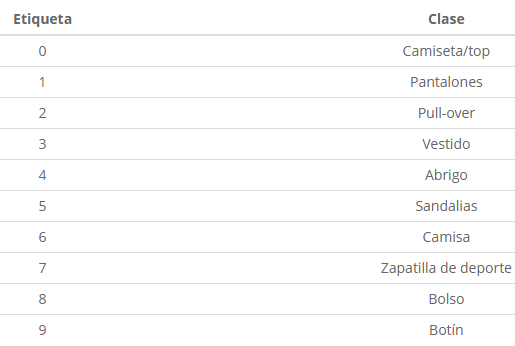

Solo por curiosidad quiero ver esa imagen

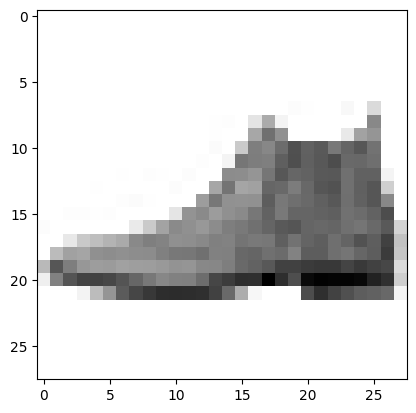

In [26]:
import matplotlib.pyplot as plt

# Mostrar la primera imagen del conjunto de prueba
plt.imshow(test_images[0], cmap=plt.cm.binary)
plt.show()

# **Ejercicio 2: Impacto variar el número de neuronas en las capas ocultas**

En este ejercicio vamos a experimentar con nuestra red neuronal cambiando el numero de neuronas por 512 y por 1024. Para ello, utiliza la red neuronal de la pregunta 1, y su capa oculta cambia las 128 neuronas:

* **pregunta 4.1 (0.25 puntos)**: 512 neuronas en la capa oculta
* **pregunta 4.2 (0.25 puntos)**:1024 neuronas en la capa oculta

y entrena la red en ambos casos.

**pregunta 4.3 (0.5 puntos)**: ¿Cual es el impacto que tiene la red neuronal?

In [28]:
### Tu código para 512 neuronas aquí ###

## Definición del Modelo

model_512 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(512, activation='sigmoid'), # Capa oculta con 512 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_512.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_512.fit(training_images, training_labels, epochs=10, batch_size=64)

## Evaluando el Modelo

test_loss, test_acc = model_512.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)



Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7548 - loss: 0.7088
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8526 - loss: 0.4084
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8683 - loss: 0.3696
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8743 - loss: 0.3440
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8822 - loss: 0.3170
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.8881 - loss: 0.2996
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8974 - loss: 0.2798
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8993 - loss: 0.2677
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9032 - loss: 0.2557
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9069 - loss: 0.2531
313/313 - 1s - 2ms/step - accuracy: 0.8827 - loss: 0.3251

Precisión en el conjunto de prueba: 0.8827000260353088


### Código para 1024 Neuronas

In [31]:
### Tu código para 1024 neuronas aquí ###

## Definición del Modelo

model_1024 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(512, activation='sigmoid'), # Capa oculta con 512 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_1024.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_1024.fit(training_images, training_labels, epochs=10, batch_size=64)

## Evaluando el Modelo

test_loss, test_acc = model_1024.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.7560 - loss: 0.7075
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8543 - loss: 0.4047
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8640 - loss: 0.3732
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8720 - loss: 0.3441
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8833 - loss: 0.3200
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.8889 - loss: 0.3006
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8960 - loss: 0.2833
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9022 - loss: 0.2654
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9029 - loss: 0.2583
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9065 - loss: 0.2486
313/313 - 1s - 2ms/step - accuracy: 0.8879 - loss: 0.3171

Precisión en el conjunto de prueba: 0.8878999948501587


Tu respuesta a la pregunta 4.3 aquí:

###¿Cual es el impacto que tiene la red neuronal?

  | Capas Ocultas | Accuracy           | Loss   | Precisión en el conjunto de prueba |
|---------------|--------------------|--------|-------------------------------------|
| 128           | 0.8792            | 0.3356 | 0.8792                             |
| 512           | 0.8827            | 0.3251 | 0.8827                             |
| 1024          | 0.8879            | 0.3171 | 0.8879                             |


Descriptivamente hablando, en la tabla se aprecia como al aumentar las capas ocultas el Accuracy aumenta, el Lost disminuye y con ello la presición del conjunto de prueba aumenta también, a simple vista parecería que entre mas capaz ocultas mejor será el modelo, sin embargo, nos fue dado ya el tratamiento de los datos con sólo dos subconjuntos, Training and Test, no tenemos Validación, entonces no tenemos la capacidad de verificar si realmente estamos en el "punto ideal" o si por otro lado estamos haciendo "Over Fitting", es decir, que el modelo ya se aprendió el test "de memoria" por lo que podría no responder adecuadamente para datos nuevos.

Si ahora entrenais el modelo de esta forma (con 512 y 1024 neuronas en la capa oculta) y volveis a ejecutar el predictor guardado en la variable **classifications**, escribir el código del clasificador del ejercicio 1 de nuevo e imprimid el primer objeto guardado en la variable classifications.

**pregunta 5.1 (0.25 puntos)**:

* ¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

**pregunta 5.2 (0.25 puntos)**:

* ¿Porque crees que ha ocurrido esto?

In [29]:
### Tu código del clasificador de la pregunta 5 aquí ###

classifications = model_512.predict(test_images)

## Impresion de la primera entrada del array en dicho clasificador,
##  la cual es la prediccion del modelo para la primera imagen del conjunto de prueba

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[7.1505485e-07 2.9795532e-07 3.1499073e-06 6.6564058e-07 3.8324556e-06 5.5392943e-02 9.6093745e-06 2.0039244e-02 1.0225478e-05 9.2453933e-01]


In [30]:
## Clase de la primera entrada de la variable classifications

predicted_class_index = np.argmax(classifications[0])
print(predicted_class_index)

9


In [32]:
## Creacion del clasificador para las imagenes de prueba

classifications = model_1024.predict(test_images)

## Impresion de la primera entrada del array en dicho clasificador,
##  la cual es la prediccion del modelo para la primera imagen del conjunto de prueba

print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[1.8478086e-07 3.4932853e-08 4.9648867e-07 9.6156043e-08 2.9539387e-07 2.3839332e-03 1.8038847e-06 6.2459735e-03 2.4834092e-06 9.9136460e-01]


In [33]:
## Clase de la primera entrada de la variable classifications

predicted_class_index = np.argmax(classifications[0])
print(predicted_class_index)

9


## Tabla de vectores de los clasificadores de acuerdo al número de capas ocultas

En la tabla los valores estas TODOS a e-7

| C Ocultas | Clase 0 | Clase 1 | Clase 2 | Clase 3 | Clase 4 | Clase 5 | Clase 6 | Clase 7 | Clase 8 | Clase 9   |
|---------------|---------|---------|---------|---------|---------|---------|---------|---------|---------|-----------|
| 128           | 1565.21 | 200.27  | 577.92  | 419.98  | 333.55  | 4781120 | 710.02  | 3835187 | 51030.97 | 91322458.0 |
| 512           | 71.51   | 29.80   | 314.99  | 66.56   | 383.25  | 5539294 | 96.09   | 2003924 | 102.25   | 92453933.0 |
| 1024          | 18.48   | 3.49    | 49.65   | 9.62    | 29.54   | 238393.3| 1.80    | 624597.4| 2.48     | 99136460.0 |


Tu respuesta a la pregunta 5.1 aquí:

¿En que clase esta clasificado ahora la primera prenda de vestir de la variable classifications?

Da la misma clase, la 9, por curiosidad arriba puse una tabla para entender mejor los resultados del clasificador creado en cada caso.

Tu respuesta a la pregunta 5.2 aquí:

¿Porque crees que ha ocurrido esto?

Lo que se nota en común para los tres escenarios (en la tabla de arriba) es que la clase 9 es la que tiene la probabilidad más alta, es la favorita, muchísimo mayor que el resto, me da miedo que entonces todo lo quiera clasificar como un botín, que de manera peculiar sí es la imagen inicial del test.

Me atrevo a decir que existe un sesgo producto del desbalance de los datos del dataset.

# **Ejercicio 3: ¿por qué es tan importante la capa Flatten?**

En este ejercicio vamos a ver que ocurre cuando quitamos la capa flatten, para ello, escribe la red neuronal de la pregunta 1 y no pongas la capa Flatten.

**pregunta 6 (0.5 puntos):** ¿puedes explicar porque da el error que da?



In [35]:
### Tu código de la red neuronal sin capa flatten de la pregunta 6 aquí ###

## Definición del Modelo

model_128 = tf.keras.models.Sequential([
  ##tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(128, activation='sigmoid'), # Capa oculta con 128 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_128.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_128.fit(training_images, training_labels, epochs=10, batch_size=64)

Epoch 1/10


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None,), output.shape=(None, 28, 10)

Tu respuesta a la pregunta 6 aquí:

Las imagenes que estamos procesando son de dos dimensiones, Flatten las convierte en datos de 1 dimensión, esto es necesario ya que ambas, la red neuronal y la función de perdida que espera comparar la salida de la red neuronal con la etiqueta que es un número en una dimensión también.

# **Ejercicio 4: Número de neuronas de la capa de salida**
Considerad la capa final, la de salida de la red neuronal de la pregunta 1.

**pregunta 7.1 (0.25 puntos)**: ¿Por qué son 10 las neuronas de la última capa?

**pregunta 7.2 (0.25 puntos)**: ¿Qué pasaría si tuvieras una cantidad diferente a 10?

Por ejemplo, intenta entrenar la red con 5, para ello utiliza la red neuronal de la pregunta 1 y cambia a 5 el número de neuronas en la última capa.

In [36]:
### Tu código de la red neuronal con 5 neuronas en la capa de salida de la pregunta 7 aquí ###

## Definición del Modelo

model_128 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(128, activation='sigmoid'), # Capa oculta con 128 neuronas y activación sigmoid
  tf.keras.layers.Dense(5, activation='softmax') # Capa de salida con 5 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_128.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_128.fit(training_images, training_labels, epochs=10, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-36-1ef378438b17>", line 19, in <cell line: 19>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 60, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 27, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/losses.py", line 1870, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/nn.py", line 1559, in sparse_categorical_crossentropy

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 9 which is outside the valid range of [0, 5).  Label values: 3 4 1 2 3 1 1 5 9 5 4 5 4 9 2 2 6 2 5 1 0 3 3 0 1 1 7 5 4 4 9 9 5 6 6 8 0 9 0 0 1 8 7 5 9 5 1 7 3 9 8 0 9 2 6 8 3 2 6 2 7 3 0 2
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_179629]

Tu respuestas a la pregunta 7.1 aquí:

¿Por qué son 10 las neuronas de la última capa?

Son 10 Capas porque el dataset es de 10 clases, al principio sólo lo inferí por ser las el número de nueronas de la última capa 10, pero para estar seguro busqué la documentación, arriba el link y la foto respectiva.

Tu respuestas a la pregunta 7.2 aquí:

¿Qué pasaría si tuvieras una cantidad diferente a 10?

Bueno, los lables son 10, por eso ocurre el error en el código, ya que al decirle que son sólo 5 clases el programa no sabe que hacer con el resto.


# Ejercicio 5: Aumento de epoch y su efecto en la red neuronal
En este ejercicio vamos a ver el impacto de aumentar los epoch en el entrenamiento. Usando la red neuronal de la pregunta 1:

**pregunta 8.1 (0.20 puntos)**
* Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 5.

**pregunta 8.2 (0.20 puntos)**
* Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.

**pregunta 8.3 (0.60 puntos)**
* ¿Porque que piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

In [37]:
### Tu código para 15 epoch aquí ###

## Definición del Modelo

model_128 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(128, activation='sigmoid'), # Capa oculta con 128 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 5 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_128.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_128.fit(training_images, training_labels, epochs=15, batch_size=64)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7388 - loss: 0.8248
Epoch 2/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8487 - loss: 0.4210
Epoch 3/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8634 - loss: 0.3774
Epoch 4/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8727 - loss: 0.3530
Epoch 5/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8822 - loss: 0.3262
Epoch 6/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8864 - loss: 0.3165
Epoch 7/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8887 - loss: 0.3036
Epoch 8/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8942 - loss: 0.2942
Epoch 9/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8978 - loss: 0.2792
Epoch 10/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8982 - loss: 0.2743
Epoch 11/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9034 - loss: 0.2649
Epoch 12/15
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step

In [38]:
## Evaluando el Modelo

test_loss, test_acc = model_128.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8805 - loss: 0.3310

Precisión en el conjunto de prueba: 0.8805000185966492


In [39]:
### Tu código para 30 epoch aquí ###

## Definición del Modelo

model_128 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(128, activation='sigmoid'), # Capa oculta con 128 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 5 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_128.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_128.fit(training_images, training_labels, epochs=30, batch_size=64)

Epoch 1/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7383 - loss: 0.8292
Epoch 2/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8528 - loss: 0.4196
Epoch 3/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8612 - loss: 0.3824
Epoch 4/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8729 - loss: 0.3548
Epoch 5/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8812 - loss: 0.3352
Epoch 6/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8831 - loss: 0.3210
Epoch 7/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8901 - loss: 0.3046
Epoch 8/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8939 - loss: 0.2907
Epoch 9/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8982 - loss: 0.2816
Epoch 10/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8991 - loss: 0.2726
Epoch 11/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9032 - loss: 0.2637
Epoch 12/30
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step

In [40]:
## Evaluando el Modelo

test_loss, test_acc = model_128.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.8909 - loss: 0.3199

Precisión en el conjunto de prueba: 0.8909000158309937


Tu respuesta a la pregunta 8.3 aquí:

8.1 Intentad 15 epoch para su entrenamiento, probablemente obtendras un modelo con una pérdida mucho mejor que el que tiene 10.

8.2 Intenta ahora con 30 epoch para su entrenamiento, podrás ver que el valor de la pérdida deja de disminuir, y a veces aumenta.


¿Porque piensas que ocurre esto? Explica tu respuesta y da el nombre de este efecto si lo conoces.

Bueno, no observo que con 30 epocas el lost aumente, de nuevo, no tenemos los datos de validacion por lo tanto no podemos ver como se comporta, pero en teoría, si el lost empieza a aumentar cuando la tendencia era a la baja lo que estamos es en la presencia de un over fitting, eso puede indicar que los datos de entrenamiento ya están siendo memorizados y por lo tanto el modelo podría ya no ser apto para clasificar-predecir datos nuevos.




| Épocas | Accuracy    | Loss    | Precisión en el conjunto de prueba |
|--------|-------------|---------|------------------------------------|
| 10     | 0.8792      | 0.3356  | 0.8791999816894531                |
| 15     | 0.8805      | 0.3310  | 0.8805000185966492                |
| 30     | 0.8909      | 0.3199  | 0.8909000158309937                |





In [45]:
## Probando con 120 Epochs para detectar posible overfitting


## Definición del Modelo

model_128 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Aplana las imágenes de 28x28 a un vector de 784
  tf.keras.layers.Dense(128, activation='sigmoid'), # Capa oculta con 128 neuronas y activación sigmoid
  tf.keras.layers.Dense(10, activation='softmax') # Capa de salida con 10 neuronas (una por clase) y activación softmax
])

## Compilación del Modelo

model_128.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Entrenamiento del Modelo

model_128.fit(training_images, training_labels, epochs=120, batch_size=64)

Epoch 1/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7285 - loss: 0.8607
Epoch 2/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8469 - loss: 0.4301
Epoch 3/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8614 - loss: 0.3810
Epoch 4/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8743 - loss: 0.3484
Epoch 5/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8803 - loss: 0.3359
Epoch 6/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8871 - loss: 0.3167
Epoch 7/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8903 - loss: 0.3057
Epoch 8/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8919 - loss: 0.2938
Epoch 9/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8980 - loss: 0.2796
Epoch 10/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9018 - loss: 0.2691
Epoch 11/120
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9045 - loss: 0.2643
Epoch 12/120
938/938 ━━━━━━━━━━━━━━━━━━━━

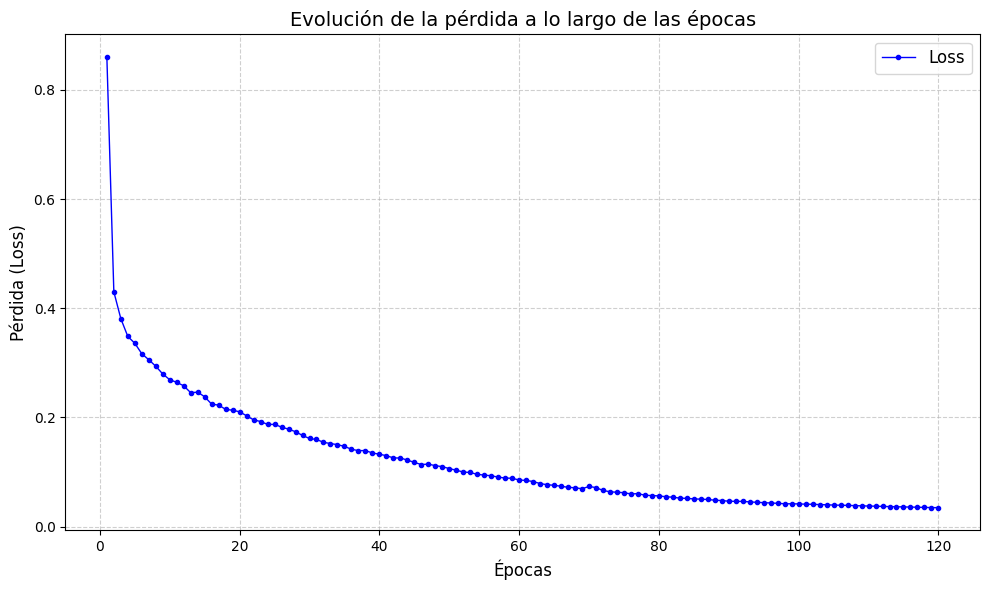

In [46]:
import matplotlib.pyplot as plt

# Datos de pérdida (loss) de las 120 épocas
loss_values = [
    0.8607, 0.4301, 0.3810, 0.3484, 0.3359, 0.3167, 0.3057, 0.2938, 0.2796, 0.2691,
    0.2643, 0.2579, 0.2453, 0.2463, 0.2378, 0.2243, 0.2226, 0.2147, 0.2132, 0.2103,
    0.2030, 0.1955, 0.1925, 0.1872, 0.1872, 0.1823, 0.1785, 0.1738, 0.1670, 0.1614,
    0.1596, 0.1544, 0.1521, 0.1501, 0.1469, 0.1417, 0.1391, 0.1393, 0.1348, 0.1326,
    0.1299, 0.1258, 0.1256, 0.1219, 0.1175, 0.1137, 0.1144, 0.1116, 0.1098, 0.1062,
    0.1033, 0.0999, 0.0991, 0.0957, 0.0943, 0.0931, 0.0906, 0.0889, 0.0885, 0.0853,
    0.0845, 0.0825, 0.0788, 0.0767, 0.0756, 0.0739, 0.0719, 0.0711, 0.0693, 0.0735,
    0.0714, 0.0661, 0.0638, 0.0628, 0.0621, 0.0597, 0.0604, 0.0574, 0.0568, 0.0562,
    0.0546, 0.0538, 0.0521, 0.0516, 0.0507, 0.0502, 0.0496, 0.0483, 0.0477, 0.0464,
    0.0462, 0.0461, 0.0452, 0.0444, 0.0438, 0.0432, 0.0426, 0.0418, 0.0417, 0.0415,
    0.0410, 0.0408, 0.0403, 0.0399, 0.0394, 0.0391, 0.0388, 0.0384, 0.0380, 0.0376,
    0.0373, 0.0369, 0.0366, 0.0363, 0.0360, 0.0357, 0.0354, 0.0351, 0.0348, 0.0346
]

# Crear la gráfica de pérdidas
epochs = range(1, 121)
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss_values, label='Loss', color='blue', marker='o', markersize=3, linewidth=1)

# Configuración de la gráfica
plt.title('Evolución de la pérdida a lo largo de las épocas', fontsize=14)
plt.xlabel('Épocas', fontsize=12)
plt.ylabel('Pérdida (Loss)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


In [47]:
## Evaluando el Modelo

test_loss, test_acc = model_128.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.8864 - loss: 0.5532

Precisión en el conjunto de prueba: 0.8863999843597412


# Ejercicio 6: Early stop
En el ejercicio anterior, cuando entrenabas con epoch extras, tenías un problema en el que tu pérdida podía cambiar. Puede que te haya llevado un poco de tiempo esperar a que el entrenamiento lo hiciera,  y puede que hayas pensado "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 85% podría ser suficiente para ti, y si alcanzas eso después de 3 epoch, ¿por qué sentarte a esperar a que termine muchas más épocas? Como cualquier otro programa existen formas de parar la ejecución

A partir del ejemplo de código que

 se da, hacer una nueva función que tenga en cuenta la perdida (loss) y que pueda parar el código para
evitar que ocurra el efeto secundario que vimos en el ejercicio 5.

In [ ]:
### Ejemplo de código

class myCallback(tf.keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')> 0.85):
              print("\nAlcanzado el 85% de precisión, se cancela el entrenamiento!!")
              self.model.stop_training = True

**Pregunta 9 (2 puntos)**: Completa el siguiente código con una clase callback que una vez alcanzado el 40% de perdida detenga el entrenamiento.

In [48]:
import tensorflow as tf
print(tf.__version__)

### Tu código de la función callback para parar el entrenamiento de la red neuronal al 40% de loss aqui: ###

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        # Verifica si el valor de 'loss' es menor o igual a 0.4
        if logs.get('loss') <= 0.4:
            print(f"\nPérdida alcanzada ({logs.get('loss')}), se cancela el entrenamiento!!")
            self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=50, callbacks=[callbacks])

2.17.1
Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7969 - loss: 0.5799
Epoch 2/50
1869/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8683 - loss: 0.3658
Pérdida alcanzada (0.3575494587421417), se cancela el entrenamiento!!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.8683 - loss: 0.3657


In [49]:
## Evaluando el Modelo

test_loss, test_acc = model_128.evaluate(test_images, test_labels, verbose=2)

print('\nPrecisión en el conjunto de prueba:', test_acc)

313/313 - 0s - 1ms/step - accuracy: 0.8864 - loss: 0.5532

Precisión en el conjunto de prueba: 0.8863999843597412
